In [41]:
import pandas as pd

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [18]:
df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')

In [19]:
len(df.columns)

19

In [20]:
df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
df['duration'] = df.duration.dt.total_seconds() / 60

In [21]:
df.duration.mean()

np.float64(15.668995167330452)

In [22]:
df.duration.std()

np.float64(42.59435124195458)

In [23]:
len(df[(df.duration >= 1) & (df.duration <= 60)]) / len(df) * 100

98.1220282212598

In [24]:
df = df[(df.duration >= 1) & (df.duration <= 60)].copy()

In [25]:
categorical = ['PULocationID', 'DOLocationID']

In [26]:
df[categorical] = df[categorical].astype(str)

In [27]:
train_dicts = df[categorical].to_dict(orient='records')

In [28]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [29]:
print(f'Feature matrix size: {X_train.shape}')

Feature matrix size: (3009173, 515)


In [30]:
target = 'duration'
y_train = df[target].values

In [42]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

print(f'Train RMSE: {root_mean_squared_error(y_train, y_pred)}')

Train RMSE: 7.649262183753913


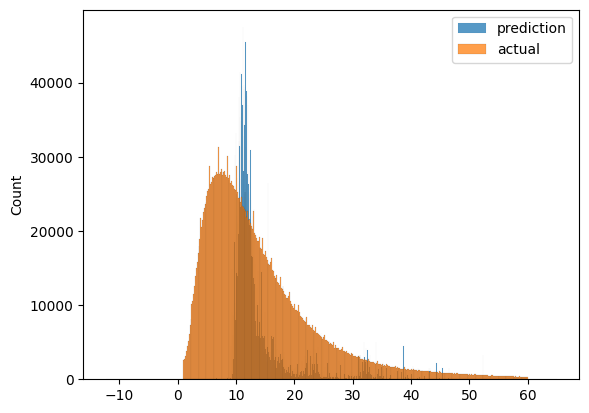

In [43]:
sns.histplot(y_pred, label='prediction')
sns.histplot(y_train, label='actual')

plt.legend();

In [34]:
categorical = ['PULocationID', 'DOLocationID']

def read_data(filename):
    df = pd.read_parquet(filename)

    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.dt.total_seconds() / 60

    df = df[(df.duration >= 1) & (df.duration <= 60)].copy()

    df[categorical] = df[categorical].astype('str')
    
    return df

In [35]:
df_val = read_data('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')

In [36]:
val_dicts = df_val[categorical].to_dict(orient='records')

In [37]:
X_val = dv.transform(val_dicts) 
y_val = df_val.duration.values

In [38]:
y_pred = lr.predict(X_val)

In [40]:
print(f'Val RMSE: {mean_squared_error(y_val, y_pred)}')

Val RMSE: 61.024408171359546
